In [1]:
from sklearn import datasets
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

%matplotlib inline

In [2]:
iris = datasets.load_iris()
X = iris.data
df = pd.DataFrame(X)
df.columns = iris.feature_names


The dataset we're using today contains information about flowers called an iris.  We're going to use K-Means clustering to atttempt to identify unique types of iris.

Step 1:  Use my method below to identify how many groups are in the dataset.

Step 2:  add the kmeans cluster labels into the dataframe df.


In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
df.shape
#150 observations and 4 variables

(150, 4)

In [5]:
#feature scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

df_scaled

array([[ -9.00681170e-01,   1.03205722e+00,  -1.34127240e+00,
         -1.31297673e+00],
       [ -1.14301691e+00,  -1.24957601e-01,  -1.34127240e+00,
         -1.31297673e+00],
       [ -1.38535265e+00,   3.37848329e-01,  -1.39813811e+00,
         -1.31297673e+00],
       [ -1.50652052e+00,   1.06445364e-01,  -1.28440670e+00,
         -1.31297673e+00],
       [ -1.02184904e+00,   1.26346019e+00,  -1.34127240e+00,
         -1.31297673e+00],
       [ -5.37177559e-01,   1.95766909e+00,  -1.17067529e+00,
         -1.05003079e+00],
       [ -1.50652052e+00,   8.00654259e-01,  -1.34127240e+00,
         -1.18150376e+00],
       [ -1.02184904e+00,   8.00654259e-01,  -1.28440670e+00,
         -1.31297673e+00],
       [ -1.74885626e+00,  -3.56360566e-01,  -1.34127240e+00,
         -1.31297673e+00],
       [ -1.14301691e+00,   1.06445364e-01,  -1.28440670e+00,
         -1.44444970e+00],
       [ -5.37177559e-01,   1.49486315e+00,  -1.28440670e+00,
         -1.31297673e+00],
       [ -1.26418478e

In [6]:
def find_k (X, k_range, sample_percent=1):
    """
    k_range: a list of possible k values
    X, the data we're clustering on
    """
    from sklearn.cluster import KMeans
    import matplotlib.pyplot as plt
    import numpy as np
    from scipy.spatial.distance import cdist
    from sklearn.metrics import pairwise_distances

    N = X.shape[0]
    sampleSize = X.shape[0] * sample_percent

    if sampleSize > 0:
        index = np.arange(np.shape(X)[0])
        np.random.shuffle(index)
        X =  X[index, :]


    mean_distortions=[]
    for k in k_range:
        #cluster using k, then calculate the mean distortion (average distance to closest centroid)
        kmeans_model = KMeans(n_clusters=k, init='k-means++', n_jobs=-1).fit(X)
        mean_distortions.append(sum(np.min(pairwise_distances(X, kmeans_model.cluster_centers_,
                                                              metric='euclidean'),axis=1)) / X.shape[0])


    #visualize results
    plt.plot(k_range, mean_distortions)
    plt.xlabel("K Value")
    plt.ylabel("Mean Distortion")
    plt.title("Elbow Graph for Mean Distortion per K")
    plt.show()

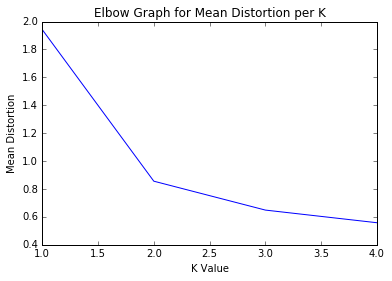

In [7]:
find_k(np.matrix(X), range(1,5),1)
#closer look shows elbow at 2 slight one at 3

In [8]:
#model
km = KMeans(n_clusters=3, random_state=42)
km.fit(df_scaled)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=42, tol=0.0001,
    verbose=0)

In [9]:
km.cluster_centers_
#cluster 1 - 3

array([[ 1.13597027,  0.09659843,  0.996271  ,  1.01717187],
       [-1.01457897,  0.84230679, -1.30487835, -1.25512862],
       [-0.05021989, -0.88029181,  0.34753171,  0.28206327]])

In [10]:
df['labels'] = km.labels_

In [16]:
df.tail()
#labels = K mean predicted label added to dataframe

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labels
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0
149,5.9,3.0,5.1,1.8,2


In [12]:
df['labels'].value_counts()

2    53
1    50
0    47
Name: labels, dtype: int64

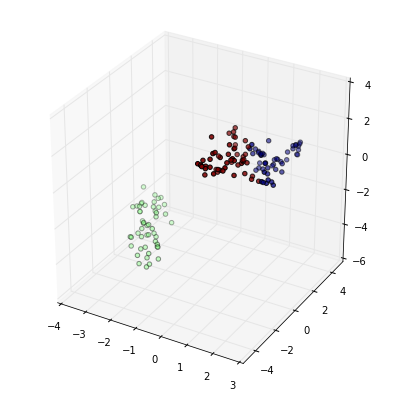

In [13]:
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

model = TSNE(n_components=3, learning_rate=84, random_state=42)
X_tsne = model.fit_transform(X) 
plt.figure(figsize=(15,15))
ax = plt.subplot(222, projection='3d')
ax.scatter(X_tsne[:, 0], X_tsne[:, 1],X_tsne[:, 2], c=km.labels_)

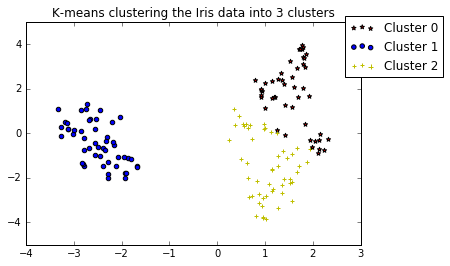

In [14]:
#So glad I put the extra effort into getting this code to work...it wasn't enough to prefer 3 clusters over 2 simply
#becuase my inuition was leaning that way;the data had to prove it to me.
#Though it's only 2d, the graph displays the 3 disctint cluster locs
#looking forward to the graph theory lesson!!!=D
#curious how to place these graphs side by side
import pylab as pl
for maplabel in range(0, X_tsne.shape[0]):
    if km.labels_[maplabel] == 0:
        c0 = pl.scatter(X_tsne[maplabel,0],X_tsne[maplabel,1],c='r', marker='*')
    elif km.labels_[maplabel] == 1:
        c1 = pl.scatter(X_tsne[maplabel,0],X_tsne[maplabel,1],c='b', marker='o')
    elif km.labels_[maplabel] == 2:
        c2 = pl.scatter(X_tsne[maplabel,0],X_tsne[maplabel,1],c='y', marker='+')
pl.legend([c0,c1,c2],['Cluster 0','Cluster 1', 'Cluster 2'],loc='upper center', bbox_to_anchor=(1.1, 1.05))
pl.title('K-means clustering the Iris data into 3 clusters')
pl.show()